# Classification

## Classification using Linear Regression


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1 = np.random.normal(5,1,10)
x1 = np.append(np.random.normal(5, 1, 9), 20) #
x2 = np.random.normal(2,1,10)
x = np.append(x1,x2)
labels = [0.]*len(x1) + [1.]*len(x2)

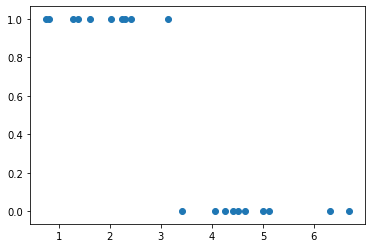

In [3]:
plt.scatter(x,labels)

In [4]:
learning_rate = 0.001
training_epochs = 1000

X = tf.placeholder("float")
Y = tf.placeholder("float")
w = tf.Variable([0.,0.],name="parameter",dtype=tf.float32)

def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)),
                  tf.multiply(w[0], tf.pow(X, 0)))

y_pred = model(X,w)
cost = tf.reduce_sum(tf.square(Y-y_pred))

trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
correct_predictions = tf.equal(Y,tf.cast(tf.greater(y_pred,0.5),dtype=tf.float32))
accuracy = tf.reduce_mean(tf.cast(correct_predictions,dtype=tf.float32))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #costs= []
    for epoch in range(training_epochs):
        sess.run(trainer, feed_dict={X:x,Y:labels})
        curr_cost = sess.run(cost, feed_dict={X:x,Y:labels})
        if epoch % 100 == 0:
            print(epoch, " ",curr_cost)
    w_val = sess.run(w)
    print('Learned parameter : ', w_val)
    #print("Correct predictions : ",sess.run(correct_predictions,feed_dict={X:x,Y:labels}))
    #print("Accuracy :", sess.run(accuracy,feed_dict={X:x,Y:labels}))
    #print(sess.run(tf.greater(y_pred,0.5),feed_dict={X:x,Y:labels}))
    sess.close()
        

0   8.778688
100   2.599059
200   1.4481404
300   1.2259932
400   1.1831151
500   1.1748389
600   1.1732414
700   1.1729329
800   1.1728733
900   1.1728619
Learned parameter :  [ 1.3321502  -0.25076604]


In [6]:
y_model=w_val[0]+w_val[1]*x

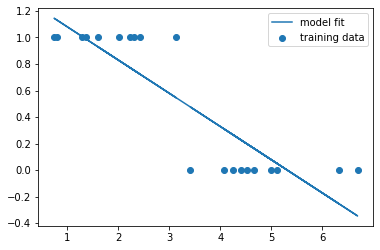

In [7]:
plt.scatter(x,labels,label="training data")
plt.plot(x,y_model, label="model fit")
plt.legend()
plt.show()

## What if there are outliers?

In [8]:
x1 = np.append(np.random.normal(5, 1, 9), 20) #outlier added
x2 = np.random.normal(2,1,10)
x = np.append(x1,x2)
labels = [0.]*len(x1) + [1.]*len(x2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        sess.run(trainer, feed_dict={X:x,Y:labels})
        curr_cost = sess.run(cost, feed_dict={X:x,Y:labels})
        if epoch % 100 == 0:
            print(epoch, " ",curr_cost)
    w_val = sess.run(w)
    print('Learned parameter : ', w_val)
    sess.close()

0   9.093418
100   3.8888495
200   3.7717733
300   3.7690945
400   3.7690337
500   3.769032
600   3.769032
700   3.7690322
800   3.7690322
900   3.7690322
Learned parameter :  [ 0.76063544 -0.06284973]


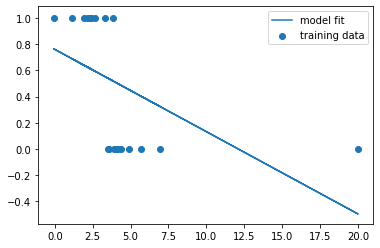

In [9]:
y_model=w_val[0]+w_val[1]*x
plt.scatter(x,labels,label="training data")
plt.plot(x,y_model, label="model fit")
plt.legend()
plt.show()

## Logistic Regression (Classification :P)

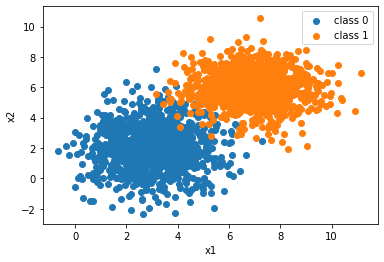

In [47]:
# Gernerate fake 2D data 
x1_l1=np.random.normal(3,1.3,[1000,1])
x1_l2=np.random.normal(7,1.2,[1000,1])
x2_l1=np.random.normal(2,1.5,[1000,1])
x2_l2=np.random.normal(6,1.1,[1000,1])
x1=np.append(x1_l1,x1_l2,axis=0)
x2=np.append(x2_l1,x2_l2,axis=0)
x=np.append(x1,x2,axis=1)
y=np.array([[0.]*len(x1_l1)+[1.]*len(x2_l2)]).T

plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [118]:
learning_rate = 0.0001
training_epochs = 3000

def sigmoid(x):
    return 1/(1+np.exp(-x))

(m,n) = x.shape

In [119]:
# define placeholders and variables
X = tf.placeholder(tf.float32, [None, n])
Y = tf.placeholder(tf.float32,[None,1])
b = tf.Variable(0.0, name='bias', dtype=tf.float32,trainable=True)
w = tf.Variable(np.zeros([n,1]), name='weights', dtype=tf.float32, trainable=True)

In [120]:
# model
y_model = tf.sigmoid(tf.matmul(X,w)+b)
#y_model = tf.sigmoid(X@w+b)
#y_model = tf.sigmoid(X[:,0]*w[0,0]+X[:,1]*w[1,0]+b)

In [121]:
# cost
cost = -tf.reduce_sum(Y*tf.log(y_model)+(1-Y)*tf.log(1-y_model))

In [122]:
# trainer
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
correct_predictions = tf.equal(Y,tf.cast(tf.greater(y_model,0.5),dtype=tf.float32))
accuracy = tf.reduce_mean(tf.cast(correct_predictions,dtype=tf.float32))

In [123]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_cost = 0
    for epoch in range(training_epochs):
        curr_cost,_ = sess.run([cost,trainer], feed_dict={X:x,Y:y})
        if epoch % 100 == 0:
            print(epoch, " ",curr_cost)
        if abs(prev_cost-curr_cost)<0.001:
            break
        prev_cost = curr_cost
    w_val = sess.run(w)
    b_val = sess.run(b)
    print('Learned weights : ', w_val)
    print('Learned bias : ', b_val)
    print("Correct predictions : ",sess.run(correct_predictions,feed_dict={X:x,Y:y}))
    print("Accuracy :", sess.run(accuracy,feed_dict={X:x,Y:y}))
    print(sess.run(tf.greater(y_model,0.5),feed_dict={X:x,Y:y}))
    sess.close()

0   1386.2919
100   592.1876
200   414.95615
300   332.74136
400   285.0508
500   253.67398
600   231.3216
700   214.50604
800   201.34589
900   190.73315
1000   181.97171
1100   174.60098
1200   168.3035
1300   162.85323
1400   158.08426
1500   153.872
1600   150.1211
1700   146.75702
1800   143.72105
1900   140.96573
2000   138.4526
2100   136.15005
2200   134.03174
2300   132.07594
2400   130.26389
2500   128.57988
2600   127.010315
2700   125.54372
2800   124.16999
2900   122.88023
Learned weights :  [[1.2152867]
 [1.2059113]]
Learned bias :  -10.953504
Correct predictions :  [[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]
Accuracy : 0.9835
[[False]
 [False]
 [False]
 ...
 [ True]
 [ True]
 [ True]]


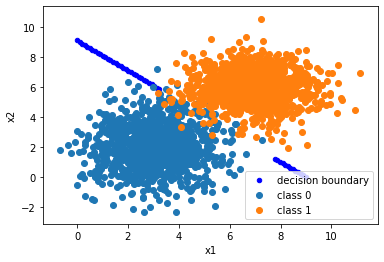

In [124]:
x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(-x2_test*w_val[1] - x1_test*w_val[0] - b_val)
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20, label = 'decision boundary')
plt.scatter(x1_l1,x2_l1,label='class 0')
plt.scatter(x1_l2,x2_l2,label='class 1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [28]:
n

2